# Pytorch Programming


## 1. 暴力破解

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

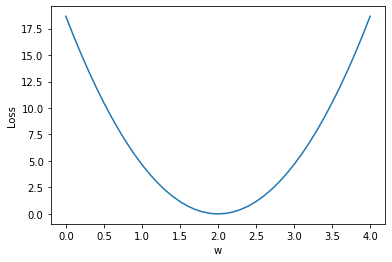

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


# our model for the forward pass
def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# List of weights/Mean square Error (Mse) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    # Print the weights and initialize the lost
    print("w=", w)
    l_sum = 0

    for x_val, y_val in zip(x_data, y_data):
        # For each input and output, calculate y_hat
        # Compute the total loss and add to the total error
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    # Now compute the Mean squared error (mse) of each
    # Aggregate the weight/mse from this run
    print("MSE=", l_sum / len(x_data))
    w_list.append(w)
    mse_list.append(l_sum / len(x_data))

# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## 2. 梯度下降 (手動) dJ/dw= 自行計算
### ref: derivative calculator 

Prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 2.69
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1.47
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 0.8
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 0.24
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 0.13
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 0.07
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 0.04
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 0.02
	

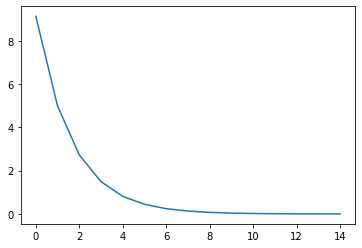

In [4]:
# Training Data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  # a random guess: random value

losses=[]

# our model forward pass
def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


# compute gradient
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y)


# Before training
print("Prediction (before training)",  4, forward(4))

# Training loop
epoches=15
for epoch in range(epoches):
    loss_t=0
    for x_val, y_val in zip(x_data, y_data):
        # Compute derivative w.r.t to the learned weights
        # Update the weights
        # Compute the loss and print progress
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        print("\tgrad: ", x_val, y_val, round(grad, 2))
        l = loss(x_val, y_val)
        loss_t +=l
    print("progress:", epoch, "w=", round(w, 2), "loss=", round(l, 2))
    losses.append(loss_t)

# After training
print("Predicted score (after training)",  "4 hours of studying: ", forward(4))

import matplotlib.pyplot as plt
plt.plot(range(epoches),losses)


# 3. Pytorch 內建 Auto-Gradinet

### 講解一下 loss.backward()


In [19]:
import torch
w=torch.tensor(1.,requires_grad=True)

x=2*w
y=3*x
z=4*y
z.backward()
print(w.grad)





tensor(24.)


Prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -9.84000015258789
	grad:  3.0 6.0 -25.70880126953125
Epoch: 0 | Loss: 6.994967937469482
	grad:  1.0 2.0 -1.2490239143371582
	grad:  2.0 4.0 -6.14519739151001
	grad:  3.0 6.0 -16.055452346801758
Epoch: 1 | Loss: 2.7281429767608643
	grad:  1.0 2.0 -0.7800302505493164
	grad:  2.0 4.0 -3.8377485275268555
	grad:  3.0 6.0 -10.026819229125977
Epoch: 2 | Loss: 1.064016580581665
	grad:  1.0 2.0 -0.487138032913208
	grad:  2.0 4.0 -2.396719217300415
	grad:  3.0 6.0 -6.261869430541992
Epoch: 3 | Loss: 0.41498300433158875
	grad:  1.0 2.0 -0.30422353744506836
	grad:  2.0 4.0 -1.4967799186706543
	grad:  3.0 6.0 -3.9106106758117676
Epoch: 4 | Loss: 0.16184940934181213
	grad:  1.0 2.0 -0.18999123573303223
	grad:  2.0 4.0 -0.9347565174102783
	grad:  3.0 6.0 -2.4422237873077393
Epoch: 5 | Loss: 0.06312382221221924
	grad:  1.0 2.0 -0.1186516284942627
	grad:  2.0 4.0 -0.5837662220001221
	grad:  3.0 6.0 -1.5251972675323486
Epoch: 6 | Lo

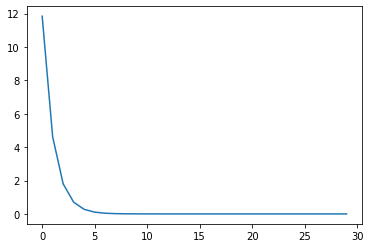

In [27]:
import torch
import pdb

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.tensor([1.0], requires_grad=True)

# our model forward pass
def forward(x):
    return x * w

# Loss function
def loss(y_pred, y_val):
    return (y_pred - y_val) ** 2

# Before training
print("Prediction (before training)",  4, forward(4).item())

# Training loop
epoches=30
losses=[]

for epoch in range(epoches):
    loss_t=0
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val) # 1) Forward pass
        l = loss(y_pred, y_val) # 2) Compute loss
        l.backward() # 3) Back propagation to update weights
        print("\tgrad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()

        # Manually zero the gradients after updating weights (every batch item)
        #w.grad.data.zero_()
        loss_t +=l
    # Manually zero the gradients after updating weights (every epoch)
    w.grad.data.zero_()
    print(f"Epoch: {epoch} | Loss: {l.item()}")
    losses.append(loss_t.detach().numpy())
    
# After training
print("Prediction (after training)",  4, forward(4).item())

import matplotlib.pyplot as plt
plt.plot(range(epoches),losses)